# Heart Disease Research Part II

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

# Read csv file into dataframe
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [58]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    object 
 2   trestbps       303 non-null    float64
 3   chol           303 non-null    float64
 4   cp             303 non-null    object 
 5   exang          303 non-null    float64
 6   fbs            303 non-null    float64
 7   thalach        303 non-null    float64
 8   heart_disease  303 non-null    object 
dtypes: float64(6), object(3)
memory usage: 21.4+ KB


In [59]:
heart.describe()

,age,trestbps,chol,exang,fbs,thalach
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.326733,0.148515,149.607261
std,9.038662,17.599748,51.776918,0.469794,0.356198,22.875003
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,133.500000
50%,56.000000,130.000000,241.000000,0.000000,0.000000,153.000000
75%,61.000000,140.000000,275.000000,1.000000,0.000000,166.000000
max,77.000000,200.000000,564.000000,1.000000,1.000000,202.000000


-**age**: age in years  
-**sex**: sex assigned at birth; 'male' or 'female'  
-**trestbps**: resting blood pressure in mm Hg  
-**chol**: serum cholesterol in mg/dl  
-**cp**: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')  
-**exang**: whether the patient experiences exercise-induced angina (1: yes; 0: no)  
-**fbs**: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)  
-**thalach**: maximum heart rate achieved in exercise test  
-**heart_disease**: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)  


Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

Text(0.5, 1.0, 'Max Exercising Heart Rate vs. Heart Disease')

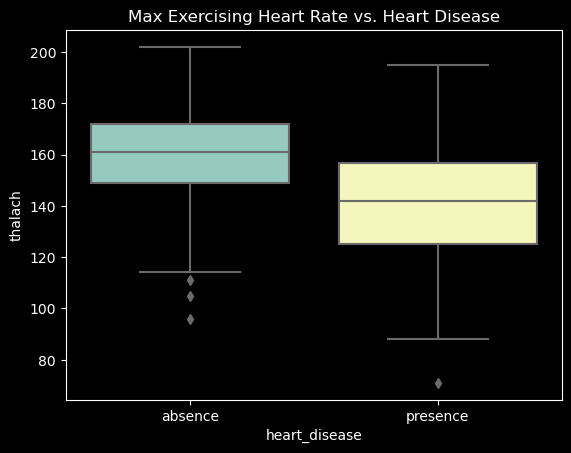

In [60]:
sns.boxplot(data= heart, x = 'heart_disease', y = 'thalach')
plt.title('Max Exercising Heart Rate vs. Heart Disease')

In [61]:
# splitting patients with and without heart disease into two groups
thalach_hd = heart.thalach[heart['heart_disease'] == 'presence']
thalach_no_hd = heart.thalach[heart['heart_disease'] == 'absence']

Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [62]:
mean_thalach_hd = thalach_hd.mean()
mean_thalach_no_hd = thalach_no_hd.mean()
mean_difference = mean_thalach_hd - mean_thalach_no_hd
print(mean_difference)

-19.11905597473242


In [63]:
median_thalach_hd = thalach_hd.median()
median_thalach_no_hd = thalach_no_hd.median()
median_difference = median_thalach_hd - mean_thalach_no_hd
print(median_difference)

-16.378048780487802


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from scipy.stats that we would use to test the following null and alternative hypotheses:

Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

In [64]:
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)

3.456964908430172e-14


>The pvalue is less than 0.05 indicating the alternative hypothesis is true

0.008548268928594928


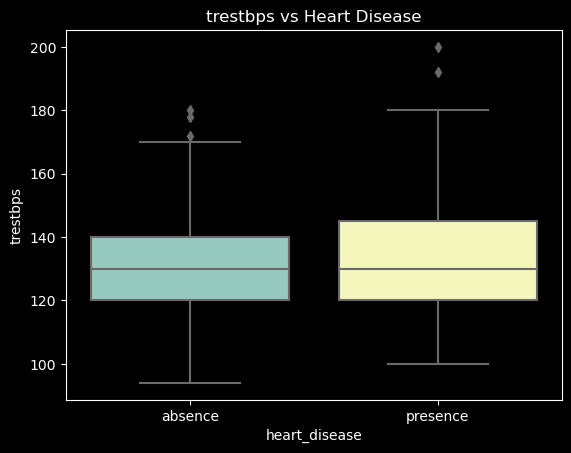

In [65]:
sns.boxplot(data= heart, x = 'heart_disease', y = 'trestbps')
plt.title('trestbps vs Heart Disease')

# splitting patients with and without heart disease into two groups
trestbps_hd = heart.trestbps[heart['heart_disease'] == 'presence']
trestbps_no_hd = heart.trestbps[heart['heart_disease'] == 'absence']

# run a two sample t test
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print(pval)

> Given a p-value of 0.009 the data indicates the people with heart disease have a different trestbps

0.13914167020436527

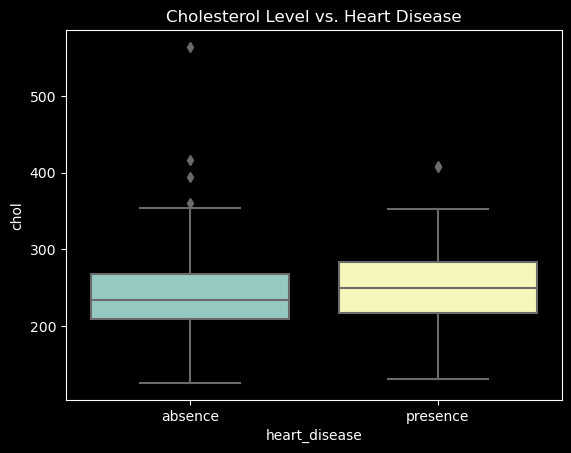

In [66]:
sns.boxplot(data= heart, x = 'heart_disease', y = 'chol')
plt.title('Cholesterol Level vs. Heart Disease')

# splitting patients with and without heart disease into two groups
chol_hd = heart.chol[heart['heart_disease'] == 'presence']
chol_no_hd = heart.chol[heart['heart_disease'] == 'absence']

# run a two sample t test
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print(pval)

> The pvalue indicates that the average cholesterol level is can be equal between patients with and without heart disease

8.955636917529706e-05

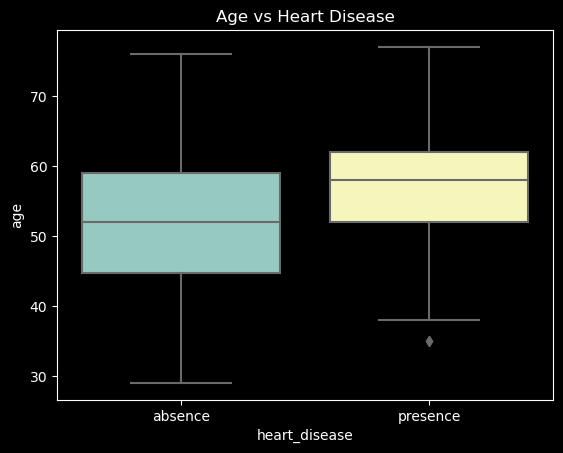

In [67]:
sns.boxplot(data= heart, x = 'heart_disease', y = 'age')
plt.title('Age vs Heart Disease')

# splitting patients with and without heart disease into two groups
age_hd = heart.age[heart['heart_disease'] == 'presence']
age_no_hd = heart.age[heart['heart_disease'] == 'absence']

# run a two sample t test
tstat, pval = ttest_ind(age_hd, age_no_hd)
print(pval)

>The p-value indicates that age is different between patients with and without heart disease

Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. Make sure to use plt.clf() to clear the previous plots first!

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

Text(0.5, 1.0, 'Chest Pain Type and Thalach')

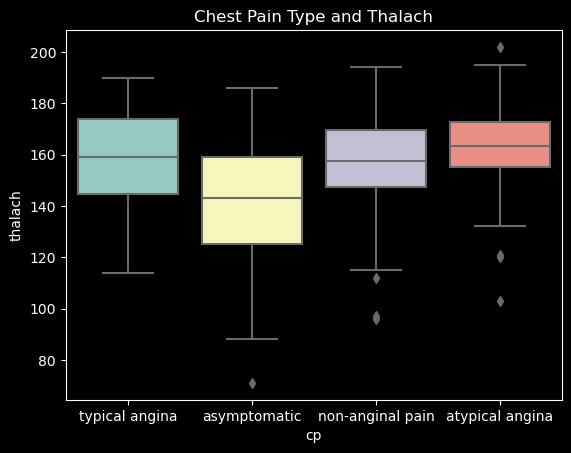

In [68]:
sns.boxplot(data= heart, x ='cp', y = 'thalach')
plt.title('Chest Pain Type and Thalach')

In [69]:
# split the types of chest pain into different variables
thalach_typcial = heart.thalach[heart['cp'] == 'typical angina']
thalach_asymptom = heart.thalach[heart['cp'] == 'asymptomatic']
thalach_nonangin = heart.thalach[heart['cp'] == 'non-anginal pain']
thalach_atypical = heart.thalach[heart['cp'] == 'atypical angina']


Run a single hypothesis test to address the following null and alternative hypotheses:

Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.
Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

In [70]:
fstat, pval = f_oneway(thalach_typcial, thalach_asymptom, thalach_nonangin, thalach_atypical)
print(pval)

1.9065505247705008e-10


In [77]:
# Tukey Range Test, any pair "False" indicates different max heart rates during exercise between types of chest pain

tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

In [82]:
xtab = pd.crosstab(heart.cp, heart.heart_disease)

print(xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [85]:
chi2, pval, dof, exp = chi2_contingency(xtab)

print(pval)

# there is a significant association between variables

1.2517106007837527e-17
